In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('telco_customer_churn.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
  df[c] = df[c].str.lower().str.replace(' ','_')

In [4]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [6]:
df.churn = (df.churn=='yes').astype(int)
#changing yes no column to 0,1 column

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [9]:
df_train, df_val = train_test_split(df_full_train,test_size = 0.25,random_state=1)

In [10]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [13]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [14]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [15]:
numerical = ['tenure','monthlycharges','totalcharges']

In [16]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [17]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [18]:
df_full_train[df_full_train['gender']=='male'].churn.mean()

0.2632135306553911

In [19]:
df_full_train[df_full_train['gender']=='female'].churn.mean()

0.27682403433476394

In [20]:
churn_no_partner = df_full_train[df_full_train['partner']=='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [21]:
churn_partner = df_full_train[df_full_train['partner']=='yes'].churn.mean()
churn_partner

0.20503330866025166

In [22]:
global_churn_rate-churn_partner

0.06493474245795922

In [23]:
global_churn_rate-churn_no_partner

-0.05984095297455855

Risk ratio

In [24]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [25]:
churn_partner/global_churn_rate

0.7594724924338315

In [26]:
from IPython.display import display

In [27]:
for c in categorical:
  print(c)
  df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
  df_group['diff'] = df_group['mean']-global_churn_rate
  df_group['risk'] = df_group['mean']/global_churn_rate
  display(df_group)
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


mutual information

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
def mutual_info_churn_score(series):
  return mutual_info_score(series,df_full_train.churn)

In [30]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [31]:
numerical = ['tenure','monthlycharges','totalcharges']

In [32]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [33]:
df_full_train[df_full_train['tenure']<=2].churn.mean()

0.5953420669577875

In [34]:
df_full_train[(df_full_train['tenure']>2) & (df_full_train['tenure']<12)].churn.mean()

0.4059003051881994

In [35]:
df_full_train[df_full_train['tenure']>12].churn.mean()

0.17634908339788277

In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
train_dicts = df_train[categorical+numerical].to_dict(orient='records')

In [38]:
dv = DictVectorizer(sparse = False)

In [39]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [40]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [41]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [42]:
X_train = dv.fit_transform(train_dicts)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.intercept_

array([-0.10889358])

In [46]:
model.coef_[0].round(3)
#have to do model.coef_[0] because it's two dimensional array with one row

array([ 0.475, -0.175, -0.408, -0.029, -0.079,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.01 ,  0.063, -0.089, -0.082,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.165,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.233, -0.071,  0.   ])

In [47]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [48]:
X_val = dv.fit_transform(val_dicts)

In [49]:
y_pred = model.predict_proba(X_val)[:,1]

In [50]:
churn_decision = (y_pred >=0.5)

In [51]:
churn_decision = churn_decision.astype(int)

In [52]:
(y_val == churn_decision).mean()

0.8034066713981547

In [53]:
y_full_train = df_full_train.churn.values

In [54]:
del df_full_train['churn']

In [55]:
full_train_dicts = df_full_train[categorical+numerical].to_dict(orient = 'records')

In [56]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(full_train_dicts)

In [57]:
model.fit(X_full_train,y_full_train)

LogisticRegression()

In [58]:
test_dicts = df_test[categorical+numerical].to_dict(orient = 'records')

In [59]:
X_test = dv.fit_transform(test_dicts)

In [60]:
y_pred = model.predict_proba(X_test)[:,1]

In [61]:
churn_decision = (y_pred >=0.5)

In [62]:
(y_test == churn_decision).mean()

0.815471965933286

Week 4

In [63]:
val_dict = df_val[categorical+numerical].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dict)

In [64]:
y_pred = model.predict_proba(X_val)[:,1]

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
threshold = np.linspace(0,1,21)

In [68]:
scores = []

In [69]:
for t in threshold:
  score = accuracy_score(y_val, y_pred >=t)
  print('%.2f,%.3f' %(t,score))
  scores.append(score)

0.00,0.274
0.05,0.495
0.10,0.590
0.15,0.664
0.20,0.720
0.25,0.754
0.30,0.774
0.35,0.779
0.40,0.785
0.45,0.796
0.50,0.802
0.55,0.815
0.60,0.803
0.65,0.790
0.70,0.778
0.75,0.759
0.80,0.737
0.85,0.727
0.90,0.726
0.95,0.726
1.00,0.726


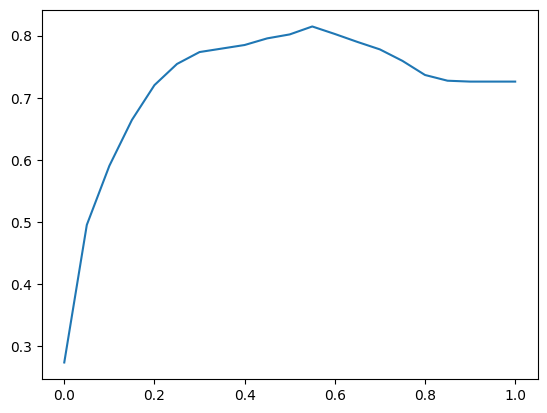

In [70]:
plt.plot(threshold,scores)

In [71]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [72]:
t = 0.5
predictive_positive = (y_pred>=t)
predictive_negative = (y_pred<t)

In [77]:
tp = (predictive_positive & actual_positive ).sum()
tn = (predictive_negative & actual_negative).sum()

In [76]:
fp = (predictive_positive & actual_negative).sum()
fn = (predictive_negative & actual_positive).sum()

In [79]:
confusion_matrix = np.array([[tn,fp],[fn,tp]])
confusion_matrix

array([[920, 103],
       [176, 210]])

In [83]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])